# **DIFFERENTIAL EVOLUTION**
## **Library**

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Kecerdasan Buatan/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kecerdasan Buatan/Titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
X = pd.get_dummies(train.drop(['Survived'], axis=1))
X_test = pd.get_dummies(test)
y = train['Survived']

## **EDA**

In [7]:
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

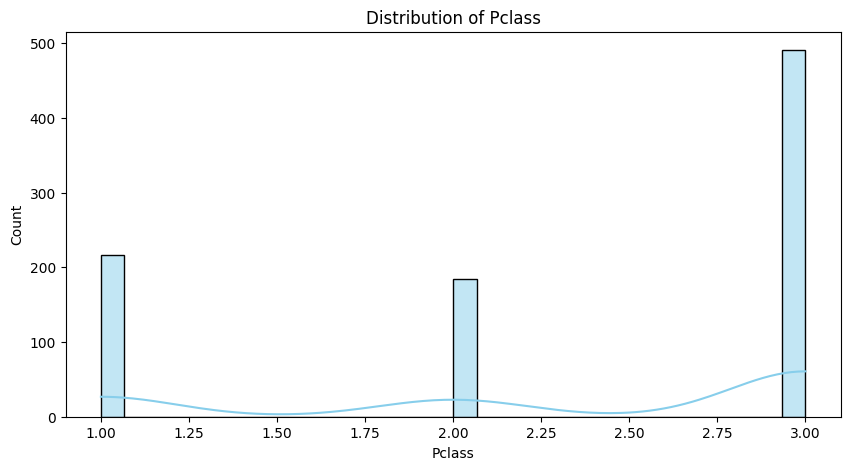

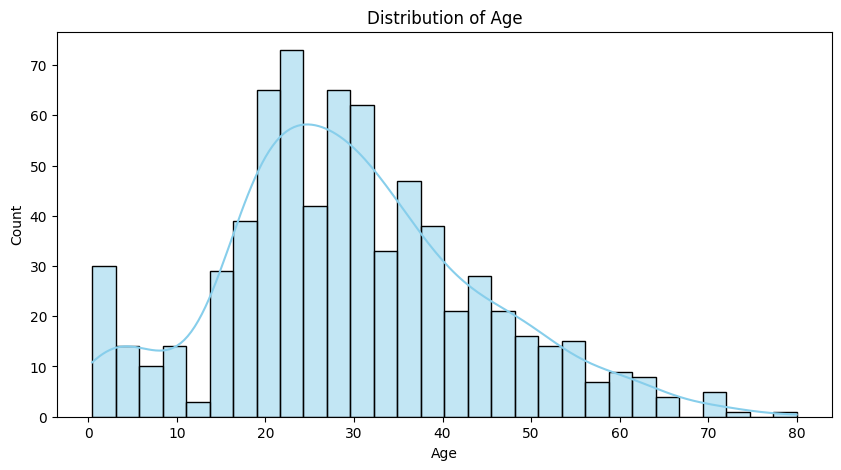

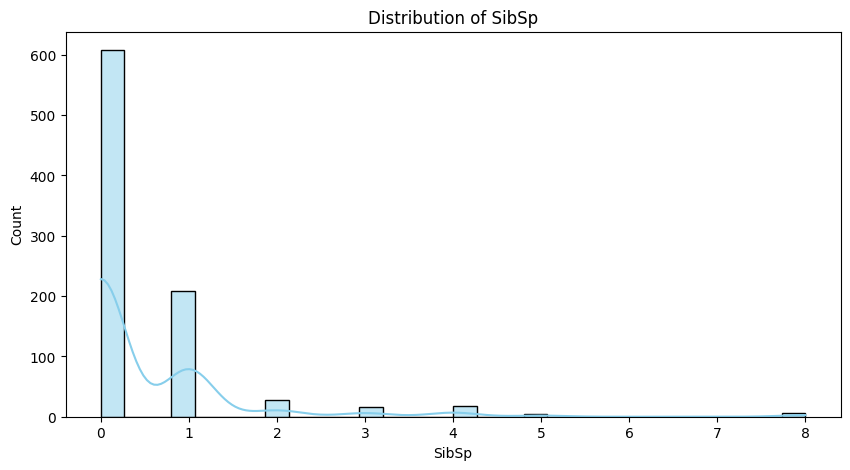

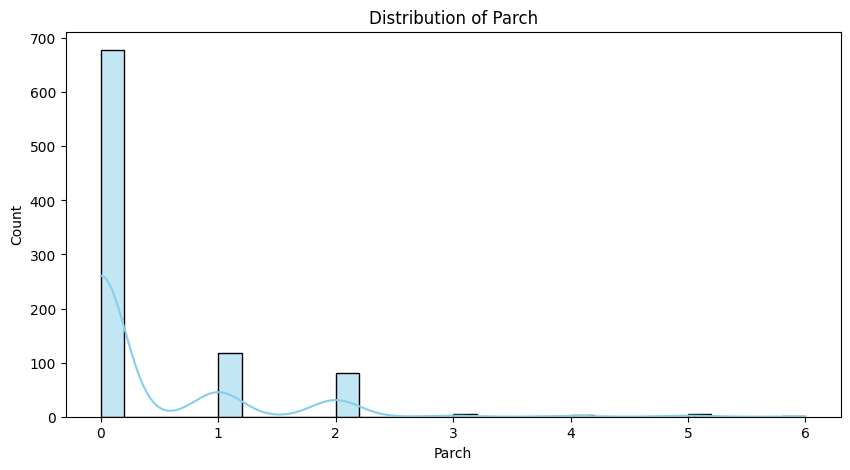

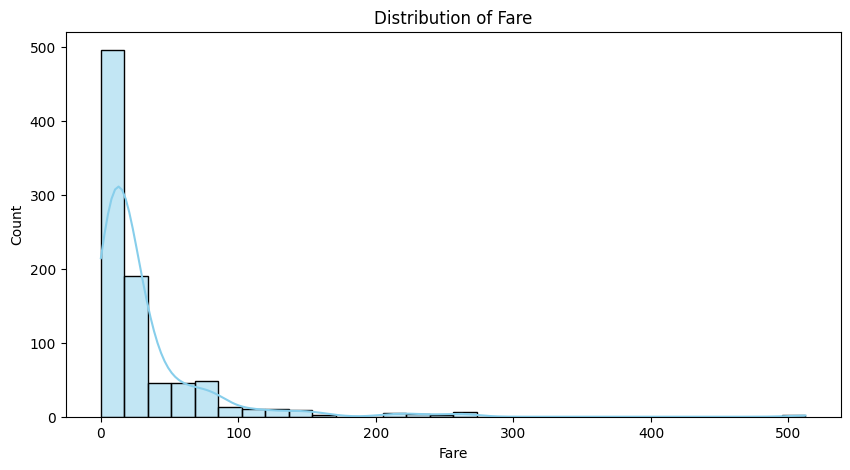

In [8]:
for i in numeric_features:
  plt.figure(figsize=(10, 5))
  sns.histplot(X[i], kde=True, bins=30, color='skyblue')
  plt.title(f'Distribution of {i}')
  plt.show()

In [9]:
# for i in categorical_features:
#   plt.figure(figsize=(10, 5))
#   sns.countplot(x=X[i], data=X, palette='Set3')
#   plt.title(f'Distribution of {i}')
#   plt.show()

## **Preprocessing**


### Train Test Split

In [ ]:
# Bagi data menjadi 80% untuk training dan 20% untuk validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling Missing Values

In [ ]:
# .isnull().sum()

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_val = imp.transform(X_val)

In [ ]:
X.isnull().sum()

### Scaling

In [ ]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_val_scaled = StandardScaler().fit_transform(X_val)

## **Modelling**

In [ ]:
def modelling(model):
  model.fit(X_train_scaled, y_train)
  predict = model.predict(X_val_scaled)
  print(classification_report(y_val, predict))

### KNN

In [ ]:
modelling(KNeighborsClassifier())

### DT

In [ ]:
modelling(DecisionTreeClassifier(random_state=42))

## **Optimization**
We'll optimize the model using differential evolution algorithm

### Differential Evolution

In [ ]:
class DifferentialEvolution:
    def __init__(self, scaling_rate=0.5, crossover_rate=0.5, population_size=20, generations=20):
        """
        Inisialisasi kelas Differential Evolution.

        Args:
            scaling_rate (float): Faktor penskalaan (F) untuk mutasi.
            crossover_rate (float): Tingkat crossover (Cr).
            population_size (int): Jumlah individu dalam populasi.
            generations (int): Jumlah generasi evolusi.
        """
        self.scaling_rate = scaling_rate
        self.crossover_rate = crossover_rate
        self.population_size = population_size
        self.generations = generations
        self.ranges = []  # List of tuples (parameter_name, [min_value, max_value])
        self.objective_function = None
        self.generation = [] # Current population

    def set_range(self, parameter_name, value_range):
        """
        Mengatur rentang nilai untuk parameter yang akan dioptimalkan.

        Args:
            parameter_name (str): Nama parameter.
            value_range (list): List dengan dua elemen [min_value, max_value].
        """
        self.ranges.append((parameter_name, value_range))

    def set_objective(self, objective_function):
        """
        Mengatur fungsi objektif yang akan diminimalkan.

        Args:
            objective_function (callable): Fungsi yang mengambil populasi sebagai input
                                          dan mengembalikan array skor untuk setiap individu.
        """
        self.objective_function = objective_function

    def initialize_population(self):
        """
        Melakukan inisialisasi populasi awal secara acak dalam rentang yang ditentukan.
        """
        if not self.ranges:
            raise ValueError("Rentang parameter harus ditentukan sebelum inisialisasi populasi.")

        num_parameters = len(self.ranges)
        self.generation = []
        for _ in range(self.population_size):
            individual = [np.random.uniform(low, high) for _, [low, high] in self.ranges]
            self.generation.append(individual)
        self.generation = np.array(self.generation)

    def mutate(self, target_vector):
        """
        Melakukan operasi mutasi pada target vector.

        Args:
            target_vector (np.ndarray): Vector target.

        Returns:
            np.ndarray: Vector mutan.
        """
        indices = list(range(self.population_size))
        indices.remove(np.where((self.generation == target_vector).all(axis=1))[0][0]) # Remove index of target vector
        random_indices = random.sample(indices, 3)

        x_a = self.generation[random_indices[0]]
        x_b = self.generation[random_indices[1]]
        x_c = self.generation[random_indices[2]]

        mutant_vector = x_a + self.scaling_rate * (x_b - x_c)

        # Clamp mutant vector values within the defined ranges
        for i, (_, [low, high]) in enumerate(self.ranges):
            mutant_vector[i] = np.clip(mutant_vector[i], low, high)

        return mutant_vector

    def crossover(self, target_vector, mutant_vector):
        """
        Melakukan operasi crossover antara target vector dan mutant vector.

        Args:
            target_vector (np.ndarray): Vector target.
            mutant_vector (np.ndarray): Vector mutan.

        Returns:
            np.ndarray: Vector trial.
        """
        num_parameters = len(self.ranges)
        trial_vector = np.copy(target_vector)
        j_rand = random.randint(0, num_parameters - 1)

        for j in range(num_parameters):
            if random.random() < self.crossover_rate or j == j_rand:
                trial_vector[j] = mutant_vector[j]

        return trial_vector

    def select(self, target_vector, trial_vector):
        """
        Melakukan operasi seleksi antara target vector dan trial vector.

        Args:
            target_vector (np.ndarray): Vector target.
            trial_vector (np.ndarray): Vector trial.

        Returns:
            np.ndarray: Vector yang dipilih (target atau trial).
        """
        # Assume objective_function returns a scalar score (lower is better)
        target_score = self.objective_function(np.array([target_vector]))[0]
        trial_score = self.objective_function(np.array([trial_vector]))[0]

        if trial_score <= target_score:
            return trial_vector
        else:
            return target_vector

    def evolve(self):
        """
        Menjalankan proses evolusi Differential Evolution selama beberapa generasi.
        """
        if not self.objective_function:
            raise ValueError("Fungsi objektif harus ditentukan sebelum evolusi.")

        self.initialize_population()

        for generation in range(self.generations):
            new_generation = []
            for i in range(self.population_size):
                target_vector = self.generation[i]

                # Mutation
                mutant_vector = self.mutate(target_vector)

                # Crossover
                trial_vector = self.crossover(target_vector, mutant_vector)

                # Selection
                selected_vector = self.select(target_vector, trial_vector)
                new_generation.append(selected_vector)

            self.generation = np.array(new_generation)

            # Optional: Print progress or best score for monitoring
            # best_score = np.min(self.objective_function(self.generation))
            # print(f"Generasi {generation+1}: Skor Terbaik = {-best_score}") # Print positive accuracy

        print("Evolusi Selesai.")


KNN

In [ ]:
# Contoh Penggunaan untuk KNN

# Definisikan fungsi objektif untuk KNN
def objective_knn(generation):
    scores = []
    for individual in generation:
        n_neighbors = int(np.round(individual[0]))

        # Ensure n_neighbors is at least 1
        n_neighbors = max(1, n_neighbors)

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        # Use cross-validation on the training data for evaluation
        acc = cross_val_score(model, X_train, y_train, cv=5).mean()
        scores.append(-acc)  # We minimize the negative accuracy
    return np.array(scores)

# Inisialisasi kelas DifferentialEvolution untuk KNN
de_knn = DifferentialEvolution(scaling_rate=0.7, crossover_rate=0.6, population_size=20, generations=50) # Kurangi generasi untuk contoh

# Atur rentang parameter untuk KNN
de_knn.set_range('n_neighbors', [1, 30])

# Atur fungsi objektif
de_knn.set_objective(objective_knn)

# Evolusi
de_knn.evolve()

# Dapatkan parameter terbaik setelah evolusi
final_scores_knn = de_knn.objective_function(de_knn.generation)
best_index_knn = np.argmin(final_scores_knn)
best_parameters_knn = de_knn.generation[best_index_knn]

best_n_neighbors = int(np.round(best_parameters_knn[0]))

print("Parameter terbaik (KNN): n_neighbors =", best_n_neighbors)
print("Skor terbaik (negatif akurasi):", final_scores_knn[best_index_knn])

Decision Tree

In [ ]:
# Contoh Penggunaan untuk Decision Tree (menggunakan kelas DifferentialEvolution yang baru)

# Definisikan fungsi objektif untuk Decision Tree
def objective_dt(generation):
    scores = []
    for individual in generation:
        max_depth = int(np.round(individual[0]))
        min_samples_split = int(np.round(individual[1]))

        # Ensure parameters are within valid ranges after rounding
        max_depth = max(1, max_depth)
        min_samples_split = max(2, min_samples_split)

        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        # Use cross-validation on the training data for evaluation
        acc = cross_val_score(model, X_train, y_train, cv=5).mean()
        scores.append(acc)  # We minimize the negative accuracy
    return np.array(scores)

# Inisialisasi kelas DifferentialEvolution
de_dt = DifferentialEvolution(scaling_rate=0.7, crossover_rate=0.6, population_size=20, generations=50) # Kurangi generasi untuk contoh

# Atur rentang parameter untuk Decision Tree
de_dt.set_range('max_depth', [3, 20])
de_dt.set_range('min_samples_split', [2, 21])

# Atur fungsi objektif
de_dt.set_objective(objective_dt)

# Evolusi
de_dt.evolve()

# Dapatkan parameter terbaik setelah evolusi
final_scores_dt = de_dt.objective_function(de_dt.generation)
best_index_dt = np.argmin(final_scores_dt)
best_parameters_dt = de_dt.generation[best_index_dt]

best_max_depth = int(np.round(best_parameters_dt[0]))
best_min_samples_split = int(np.round(best_parameters_dt[1]))

print("Parameter terbaik (Decision Tree): max_depth =", best_max_depth, ", min_samples_split =", best_min_samples_split)
print("Skor terbaik:", final_scores_dt[best_index_dt])